In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
from numpy import linalg as LA

Functions: $\\$
$f_1(x,y) = (x - 3)^2 + 3(y + 1)^2 \\$ 
$f_2(x,y) = (1 - (y-3))^2 + 10((x+4)-(y-3)^2)^2$

In [2]:
def func1(x,y):
  return (x-3)**2 + 3*(y+1)**2

In [3]:
def gradFunc1(vx,vy):
  dfdx = 2*(vx - 3)
  dfdy = 6*(vy+1)
  return np.array([dfdx,dfdy])

In [4]:
def runGradientDescent(T: int, gamma: float, vInit: np.array, func, gradFunc):
    ''' T is the number of steps, gamma is the learning rate, vInit is the starting point. 
        func and gradFunc are the functions used for the appropriate function gradient descent is being run on. '''
    values = np.zeros([T,2])
    values[0,:] = vInit
    v = vInit
    for i in range(0,T):
        v = v - gamma * gradFunc(v[0],v[1])
        values[i,:] = v
        print(f"Iteration: {i}")
        print(f"Function Value: {func(v[0],v[1])}")
        gradient = gradFunc(v[0],v[1])
        print(f"Gradient: {gradient}")
        gradNorm = LA.norm(gradient)
        print(f"2-Norm: {gradNorm}")
        
    return v,values

Gradient descent on $f_1$ with starting point (x,y) = (0,0), T = 30 steps, and $\gamma$ = .01

In [5]:
# Setting parameters:
T = 30
gamma = .01
vInit = np.array([0,0])
v,values = runGradientDescent(T, gamma, vInit, func1, gradFunc1)

Iteration: 0
Function Value: 11.2944
Gradient: [-5.88  5.64]
2-Norm: 8.147637694448619
Iteration: 1
Function Value: 10.64356032
Gradient: [-5.7624  5.3016]
2-Norm: 7.830211767251254
Iteration: 2
Function Value: 10.042190770944
Gradient: [-5.647152  4.983504]
2-Norm: 7.53164243901156
Iteration: 3
Function Value: 9.485574018859314
Gradient: [-5.53420896  4.68449376]
2-Norm: 7.2506517362526255
Iteration: 4
Function Value: 8.969500604272621
Gradient: [-5.42352478  4.40342413]
2-Norm: 6.9860407353069505
Iteration: 5
Function Value: 8.49021145805596
Gradient: [-5.31505429  4.13921869]
2-Norm: 6.7366856381878115
Iteration: 6
Function Value: 8.044347043783741
Gradient: [-5.2087532   3.89086557]
2-Norm: 6.501534029689604
Iteration: 7
Function Value: 7.628902357834766
Gradient: [-5.10457814  3.65741363]
2-Norm: 6.279601293980175
Iteration: 8
Function Value: 7.241187107856332
Gradient: [-5.00248657  3.43796881]
2-Norm: 6.06996717228105
Iteration: 9
Function Value: 6.8787904691902355
Gradient: [-4

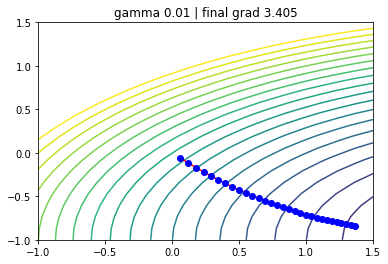

In [6]:
# Plotting contours:

# Setting up for 2-dimensional contour plot:
xlist = np.linspace(-1, 1.5, 20)
ylist = np.linspace(-1, 1.5, 20)
x, y = np.meshgrid(xlist, ylist)
z = func1(x,y)
lev = np.linspace(0,20,21)

plt.contour(x,y,z,levels=lev)
plt.plot(values[:,0],values[:,1],'r-')
plt.plot(values[:,0],values[:,1],'bo')
gradNorm = LA.norm(gradFunc1(v[0],v[1]))
title = "gamma %0.2f | final grad %0.3f" % (gamma,gradNorm)
plt.title(title)
plt.show()

Gradient descent on $f_1$ with starting point (x,y) = (10,10), T = 100 steps, and $\gamma$ = .03

In [7]:
# Setting parameters:
T = 100
gamma = .03
vInit = np.array([10,10])
v,values = runGradientDescent(T, gamma, vInit, func1, gradFunc1)

Iteration: 0
Function Value: 287.3776
Gradient: [13.16 54.12]
2-Norm: 55.6970376231986
Iteration: 1
Function Value: 202.37689791999998
Gradient: [12.3704 44.3784]
2-Norm: 46.07026354081339
Iteration: 2
Function Value: 144.158040998656
Gradient: [11.628176 36.390288]
2-Norm: 38.20297812749576
Iteration: 3
Function Value: 104.07119115768862
Gradient: [10.93048544 29.84003616]
2-Norm: 31.778975282160363
Iteration: 4
Function Value: 76.28577596560376
Gradient: [10.27465631 24.46882965]
2-Norm: 26.538503855003665
Iteration: 5
Function Value: 56.868575852017266
Gradient: [ 9.65817693 20.06444031]
2-Norm: 22.267962340928726
Iteration: 6
Function Value: 43.16363455684616
Gradient: [ 9.07868632 16.45284106]
2-Norm: 18.791448164938306
Iteration: 7
Function Value: 33.37513826645336
Gradient: [ 8.53396514 13.49132967]
2-Norm: 15.963850951148121
Iteration: 8
Function Value: 26.286790991347175
Gradient: [ 8.02192723 11.06289033]
2-Norm: 13.665242730768071
Iteration: 9
Function Value: 21.072987773923

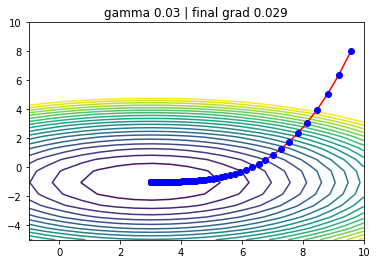

In [8]:
# Plotting contours:

# Setting up for 2-dimensional contour plot:
xlist = np.linspace(-1, 10, 20)
ylist = np.linspace(-5, 10, 20)
x, y = np.meshgrid(xlist, ylist)
z = func1(x,y)
lev = np.linspace(0,100,20)

plt.contour(x,y,z,levels=lev)
plt.plot(values[:,0],values[:,1],'r-')
plt.plot(values[:,0],values[:,1],'bo')
gradNorm = LA.norm(gradFunc1(v[0],v[1]))
title = "gamma %0.2f | final grad %0.3f" % (gamma,gradNorm)
plt.title(title)
plt.show()

In [9]:
def func2(x,y):
  return (1-(y-3))**2 + 10*((x+4) - (y-3)**2)**2

In [10]:
def gradFunc2(vx,vy):
    dfdx = 20*(vx - (vy-3)**2 + 4)
    dfdy = 2*(-20*(vy-3)*(vx-(vy-3)**2 +4 ) + vy - 4)
    return np.array([dfdx, dfdy])

Gradient descent on $f_2$ with starting point (x,y) = (0,2), T = 100 steps, and $\gamma$ = .01

In [11]:
# Setting parameters:
vInit = np.array([0,2])
T = 100
gamma = .01
v,values = runGradientDescent(T, gamma, vInit, func2, gradFunc2)

Iteration: 0
Function Value: 26.003033600000013
Gradient: [ -25.312   -115.66784]
2-Norm: 118.40501068056876
Iteration: 1
Function Value: 74.05110799064977
Gradient: [ 52.92931534 102.20360751]
2-Norm: 115.09600257901324
Iteration: 2
Function Value: 18.722458357624042
Gradient: [-19.56493731 -85.30270722]
2-Norm: 87.51764754304911
Iteration: 3
Function Value: 42.55382858376969
Gradient: [38.90234355 86.86815452]
2-Norm: 95.18124081332626
Iteration: 4
Function Value: 24.50686741780394
Gradient: [ -24.70555608 -106.93070447]
2-Norm: 109.74761983740683
Iteration: 5
Function Value: 53.763799913178204
Gradient: [44.66595074 82.86085436]
2-Norm: 94.1327166346321
Iteration: 6
Function Value: 10.445617280992387
Gradient: [-10.20560779 -42.34721726]
2-Norm: 43.55962855633302
Iteration: 7
Function Value: 14.433047535893984
Gradient: [18.7442494  46.86203702]
2-Norm: 50.471748523397515
Iteration: 8
Function Value: 13.876712189377832
Gradient: [-15.20533996 -61.81267314]
2-Norm: 63.65539194596194


Using an adjustable rate approach proves to be better than the above method. $\\$
Initial learning rate:$\\$
$b = C||f_{(x_1)}|| \\$
During the iterations the learning rate gets updated based on the following: $\\$
$b_i = b_{i-1} + \frac{||\nabla  f_{(x_i)}||^2}{b_{i-1}}$

In [12]:
def adjustedGrad(T: int, vInit: np.array, func, gradFunc):
    ''' Gradient descent with learning rate updated on each iteration.
        Learning rate chosen based on norm of gradient at initial function values multiplied by arbitrarily set constant C. 
        On each iteration learning rate becomes its current value, b 
        + the 2-norm squared of the gradient function evaluated at current function value and divided by b.'''
    values = np.zeros([T,2])
    values[0,:] = vInit
    v = vInit
    C = 20
    b = C*LA.norm(gradFunc(v[0],v[1])) # initial learning rate
    
    for i in range(1,T):
        v = v - (1/b) * gradFunc(v[0], v[1])
        b = b + (LA.norm(gradFunc(v[0],v[1]))**2)/b
        values[i,:] = v
        print(f"Iteration: {i}")
        print(f"Function Value: {func(v[0],v[1])}")
        gradient = gradFunc(v[0],v[1])
        print(f"Gradient: {gradient}")
        gradNorm = LA.norm(gradient)
        print(f"2-Norm: {gradNorm}")

    gamma = 1/b

    return v,values,gamma

In [13]:
# Setting parameters:
vInit = np.array([0,2])
T = 100
v,values,gamma = adjustedGrad(T, vInit, func2, gradFunc2)

Iteration: 1
Function Value: 87.48312694313057
Gradient: [ 57.72469527 116.48777805]
2-Norm: 130.00593400855814
Iteration: 2
Function Value: 81.05283045101929
Gradient: [ 55.38567842 116.44094554]
2-Norm: 128.94210783299562
Iteration: 3
Function Value: 74.75479424527767
Gradient: [ 52.99207296 115.84109989]
2-Norm: 127.38649936172772
Iteration: 4
Function Value: 68.63473865087093
Gradient: [ 50.55458318 114.68022815]
2-Norm: 125.32884986566589
Iteration: 5
Function Value: 62.736809669965815
Gradient: [ 48.08531869 112.96160983]
2-Norm: 122.77020472607592
Iteration: 6
Function Value: 57.10196185627373
Gradient: [ 45.59755065 110.70025624]
2-Norm: 119.72336178121748
Iteration: 7
Function Value: 51.76644585851261
Gradient: [ 43.10540744 107.92282434]
2-Norm: 116.2127882942457
Iteration: 8
Function Value: 46.76050867893344
Gradient: [ 40.62352305 104.66698112]
2-Norm: 112.27398435196308
Iteration: 9
Function Value: 42.10739965897495
Gradient: [ 38.16665507 100.98023861]
2-Norm: 107.9523142

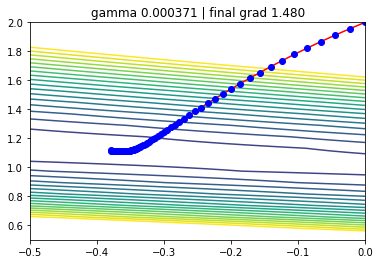

In [14]:
# Plotting contours:

# Setting up for 2-dimensional contour plot:
xlist = np.linspace(-.5, 0, 20)
ylist = np.linspace(.5, 2, 20)
x, y = np.meshgrid(xlist, ylist)
z = func2(x,y)
lev = np.linspace(0,50,21)

plt.contour(x,y,z,levels=lev)
plt.plot(values[:,0],values[:,1],'r-')
plt.plot(values[:,0],values[:,1],'bo')
gradNorm = LA.norm(gradFunc2(v[0],v[1]))
title = "gamma %0.6f | final grad %0.3f" % (gamma,gradNorm)
plt.title(title)
plt.show()